<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-generation" data-toc-modified-id="Data-generation-1">Data generation</a></span></li><li><span><a href="#Defining-the-TensorFlow-model" data-toc-modified-id="Defining-the-TensorFlow-model-2">Defining the TensorFlow model</a></span><ul class="toc-item"><li><span><a href="#<Code-Section-1>" data-toc-modified-id="<Code-Section-1>-2.1">&lt;Code Section 1&gt;</a></span></li><li><span><a href="#</Code-Section-1>" data-toc-modified-id="</Code-Section-1>-2.2">&lt;/Code Section 1&gt;</a></span></li></ul></li><li><span><a href="#Extract-the-weights-and-bias" data-toc-modified-id="Extract-the-weights-and-bias-3">Extract the weights and bias</a></span></li></ul></div>

---
We must always import the relevant libraries for our problem at hand.  
NumPy and TensorFlow are required for this example.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

import warnings
warnings.filterwarnings("ignore")

## Data generation

We generate data using the exact same logic and code as the example from the previous notebook. The only difference now is that we save it to an npz file. Npz is numpy's file type which allows you to save numpy arrays into a single .npz file. We introduce this change because in machine learning most often: 

* you are given some data (csv, database, etc.)
* you preprocess it into a desired format (later on we will see methods for preprocesing)
* you save it into npz files (if you're working in Python) to access later

Nothing to worry about - this is literally saving your NumPy arrays into a file that you can later access, nothing more.

In [5]:
# First, we should declare a variable containing the size of the training set we want to generate.
observations = 1000

# We will work with two variables as inputs. You can think about them as x1 and x2 in our previous examples.
# We have picked x and z, since it is easier to differentiate them.
# We generate them randomly, drawing from an uniform distribution. There are 3 arguments of this method (low, high, size).
# The size of xs and zs is observations x 1. In this case: 1000 x 1.
xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

# Combine the two dimensions of the input into one input matrix. 
# This is the X matrix from the linear model y = x*w + b.
# column_stack is a Numpy method, which combines two matrices (vectors) into one.
generated_inputs = np.column_stack((xs,zs))

# We add a random small noise to the function i.e. f(x,z) = 2x - 3z + 5 + <small noise>
noise = np.random.uniform(-1, 1, (observations,1))

# Produce the targets according to our f(x,z) = 2x - 3z + 5 + noise definition.
# In this way, we are basically saying: the weights should be 2 and -3, while the bias is 5.
generated_targets = 2*xs - 3*zs + 5 + noise

# save into an npz file called "TF_intro"
#np.savez--saves n-dimensional arrays in npz format, using a certain keyword for each array
#inputs,targets---labels
#generated_inputs/generated_targets--the n-dim arrays to be stored in 'labels'
#we can provide any name for the 'labels'
np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)

In [6]:
# Load the training data from the NPZ
training_data = np.load('TF_intro.npz')

the above is an important step in deep learning. Usually data is given in a specific file format. You open it,preprocess it and save it as npz file. You build your algorithm using the npz file instead of the original file

## Defining the TensorFlow model

Declare a variable where we will store the input size of our model.  
It should be equal to the number of variables you have.  In our case xs and zs

In [10]:
input_size = 2

Declare the output size of the model.  
It should be equal to the number of outputs you've got (for regressions that's usually 1, 'y')

In [11]:
output_size = 1

Unlike other packages where we have built in models, in TF we will actually build the model

Outline the model:
We lay out the model in 'Sequential'.  
Note that there are no calculations involved - we are just describing our network.  
tf2 is based on keras. So we need 'keras' module.  
```Sequential()```--specifies that we are laying down the model('stack layers').As arguments, it takes the different layers we want to include in our algorithm.  
The model which we are building is a simple one. It takes inputs, applies a single linear transformation and provides outputs.  
The linear combination, together with the outputs consititute the output layer.

```python
model = tf.keras.Sequential([
                            # Each 'layer' is listed here
                            # The method 'Dense' indicates, our mathematical operation to be (xw + b)
```
You already know from the previous example that ```output=np.dot(inputs,weights)+bias```.  
Here, it is done using ```Dense()```.  
```Dense()``` takes the inputs provided to the model and calculates the dot product of inputs and weights and adds to the bias. The first parameter we pass to ```Dense()``` is the output size which is already defined.

We have taken care of the data and model, now we are left with objective function and optimization algortihm. We use the ```compile()``` function to specify those.

```Compile(optimizer,loss)```, configures the model for training.  
- ```optimizer```: The optmization algorithm we are going to use is SGD(Stochastic Gradient Descent)
- ```loss```: mean_squared_error or the L2-norm

*check the tf.keras.optimizer documentation and tf.keras.losses docs*

---
### <Code Section 1>

So our code looks like this:

In [22]:
model=tf.keras.Sequential([tf.keras.layers.Dense(output_size)])
model.compile(optimizer='sgd',loss='mean_squared_error')

Here we havent used the learning rate or eta and have used the default ```'sgd'```

We just need to tell the model, which data to fit and also provide ```inputs``` and ```targets``` tensors as parameters. For example:
```Python
model.fit(inputs,targets)
```
This will fit/train the model and we also need to provide the number of iterations.  
*Note: Each iteration over the full data set in Machine Learning is called an **EPOCH**.*


So, we ultimately write:

In [23]:
model.fit(training_data['inputs'],training_data['targets'],epochs=100,verbose=2)
#verbose=2--gives one line per epoch
#execute the code till here and you will get the loss function information

Epoch 1/100
1000/1000 - 0s - loss: 203.5859
Epoch 2/100
1000/1000 - 0s - loss: 22.4465
Epoch 3/100
1000/1000 - 0s - loss: 18.4996
Epoch 4/100
1000/1000 - 0s - loss: 16.3031
Epoch 5/100
1000/1000 - 0s - loss: 14.4013
Epoch 6/100
1000/1000 - 0s - loss: 12.7141
Epoch 7/100
1000/1000 - 0s - loss: 11.2111
Epoch 8/100
1000/1000 - 0s - loss: 9.8939
Epoch 9/100
1000/1000 - 0s - loss: 8.7619
Epoch 10/100
1000/1000 - 0s - loss: 7.7426
Epoch 11/100
1000/1000 - 0s - loss: 6.8464
Epoch 12/100
1000/1000 - 0s - loss: 6.0640
Epoch 13/100
1000/1000 - 0s - loss: 5.3706
Epoch 14/100
1000/1000 - 0s - loss: 4.7759
Epoch 15/100
1000/1000 - 0s - loss: 4.2410
Epoch 16/100
1000/1000 - 0s - loss: 3.7633
Epoch 17/100
1000/1000 - 0s - loss: 3.3598
Epoch 18/100
1000/1000 - 0s - loss: 2.9888
Epoch 19/100
1000/1000 - 0s - loss: 2.6700
Epoch 20/100
1000/1000 - 0s - loss: 2.3870
Epoch 21/100
1000/1000 - 0s - loss: 2.1388
Epoch 22/100
1000/1000 - 0s - loss: 1.9228
Epoch 23/100
1000/1000 - 0s - loss: 1.7298
Epoch 24/100

We generated the function $2x-3z+5$ in order to assess how our model did. Now to extract the weights and bias:

In [24]:
model.layers[0].get_weights()

[array([[ 2.0029864],
        [-3.0054955]], dtype=float32), array([4.9931726], dtype=float32)]

The output above will comprise of 2 arrays. The first array is for weights, the second array is for bias.  
We will get the weights as 2 and 3 and the bias as 5, which means that our algorithm has learnt the underlying relationship.

Extract the outputs:

In [27]:
model.predict_batch(training_data['inputs'])

AttributeError: 'Sequential' object has no attribute 'predict_batch'

Similarly to compare the above output with targets, display the targets:

In [26]:
training_data['targets'].round(1)

array([[ 17.5],
       [  4.8],
       [ 10.3],
       [-13.5],
       [ 20.2],
       [-33.5],
       [ 33.6],
       [ 42.7],
       [ -5. ],
       [ 36.8],
       [ 17. ],
       [ 39.1],
       [-14.4],
       [-43.1],
       [ -0.1],
       [-19.8],
       [  2.6],
       [ 30. ],
       [ 12.9],
       [  8.1],
       [ 34.4],
       [ 11.3],
       [ 21.5],
       [ 15. ],
       [-22. ],
       [-27. ],
       [ 36. ],
       [ -4.5],
       [ 20.2],
       [ 13.7],
       [ -8.8],
       [ -8.8],
       [ 20.8],
       [-11.5],
       [  6. ],
       [ 33.6],
       [  5.5],
       [  2.8],
       [ 23. ],
       [ 43.9],
       [  8. ],
       [ 27.7],
       [-20.8],
       [  2.5],
       [ 19.5],
       [ 12.3],
       [ 28.4],
       [ 41.6],
       [-24.6],
       [-23.1],
       [-21.4],
       [ 29.1],
       [ 26.6],
       [ 18.9],
       [ 19. ],
       [  5.1],
       [ 17.6],
       [ 12.2],
       [ -7.4],
       [ -4.4],
       [ 48.3],
       [ 18.7],
       [

### </Code Section 1>
---

Making improvements to the code.
Start by executing the code contained in ```<Code Section 1>```.
Once you have executed and understand the code in section 1, Execute the code in section 2 below.

In [30]:
tf.keras.layers.Dense(output_size,
    # there are extra arguments you can include to customize your model
    # in our case we are just trying to create a solution that is 
    # as close as possible to our NumPy model
    # in the previous example, we initialized the weights and bias value using the uniform function. 
    # Do the same thing here.'Kernel' is the broader term for weight
    # Also we used the learning rate, so here also we will define the learning rate/eta                                    
         kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
         bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1))

In [31]:
# We can also define a custom optimizer, where we can specify the learning rate
custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)
# Note that sometimes you may also need a custom loss function 
# That's much harder to implement and won't be covered in this course though

'compile' is the place where you select and indicate the optimizers and the loss
Here instead of mentioning optimizer='sgd', we use custom_optimizer

In [32]:
model.compile(optimizer=custom_optimizer, loss='mean_squared_error')

finally we fit the model, indicating the inputs and targets
if they are not otherwise specified the number of epochs will be 1 (a single epoch of training), 
so the number of epochs is 'kind of' mandatory, too
we can play around with verbose; we prefer verbose=2

In [33]:
model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)

Epoch 1/100
1000/1000 - 0s - loss: 0.3910
Epoch 2/100
1000/1000 - 0s - loss: 0.3745
Epoch 3/100
1000/1000 - 0s - loss: 0.3715
Epoch 4/100
1000/1000 - 0s - loss: 0.3634
Epoch 5/100
1000/1000 - 0s - loss: 0.3662
Epoch 6/100
1000/1000 - 0s - loss: 0.3710
Epoch 7/100
1000/1000 - 0s - loss: 0.4304
Epoch 8/100
1000/1000 - 0s - loss: 0.3911
Epoch 9/100
1000/1000 - 0s - loss: 0.3931
Epoch 10/100
1000/1000 - 0s - loss: 0.3674
Epoch 11/100
1000/1000 - 0s - loss: 0.4464
Epoch 12/100
1000/1000 - 0s - loss: 0.3653
Epoch 13/100
1000/1000 - 0s - loss: 0.3810
Epoch 14/100
1000/1000 - 0s - loss: 0.3728
Epoch 15/100
1000/1000 - 0s - loss: 0.3492
Epoch 16/100
1000/1000 - 0s - loss: 0.3689
Epoch 17/100
1000/1000 - 0s - loss: 0.3574
Epoch 18/100
1000/1000 - 0s - loss: 0.3620
Epoch 19/100
1000/1000 - 0s - loss: 0.3665
Epoch 20/100
1000/1000 - 0s - loss: 0.3818
Epoch 21/100
1000/1000 - 0s - loss: 0.3616
Epoch 22/100
1000/1000 - 0s - loss: 0.3861
Epoch 23/100
1000/1000 - 0s - loss: 0.3693
Epoch 24/100
1000/10

you can create different models, by trying out different parameters for the model.compile and also different loss functions or different optmizers

---

## Extract the weights and bias
Extracting the weight(s) and bias(es) of a model is not an essential step for the machine learning process. In fact, usually they would not tell us much in a deep learning context. However, this simple example was set up in a way, which allows us to verify if the answers we get are correct.

In [12]:
# Extracting the weights and biases is achieved quite easily
model.layers[0].get_weights()

[array([[ 2.1001832],
        [-3.0081003]], dtype=float32), array([5.007238], dtype=float32)]

In [13]:
# We can save the weights and biases in separate variables for easier examination
# Note that there can be hundreds or thousands of them!
weights = model.layers[0].get_weights()[0]
weights

array([[ 2.1001832],
       [-3.0081003]], dtype=float32)

In [14]:
# We can save the weights and biases in separate variables for easier examination
# Note that there can be hundreds or thousands of them!
bias = model.layers[0].get_weights()[1]
bias

array([5.007238], dtype=float32)

In [15]:
# We can predict new values in order to actually make use of the model
# Sometimes it is useful to round the values to be able to read the output
# Usually we use this method on NEW DATA, rather than our original training data
model.predict_on_batch(training_data['inputs']).round(1)

array([[ -1.3],
       [-14.6],
       [ -9.7],
       [-41.9],
       [ 10.8],
       [ 15.3],
       [ 21.4],
       [-15.4],
       [ 37.5],
       [-30. ],
       [-41. ],
       [ 39. ],
       [-28.6],
       [-19.2],
       [ 12.9],
       [ 16.3],
       [ 18. ],
       [-19.9],
       [ 30. ],
       [-15.8],
       [ -1.5],
       [ -4.8],
       [  4.6],
       [-11.5],
       [ 27.5],
       [ -4.7],
       [  7.4],
       [  3.7],
       [ -7.4],
       [  4. ],
       [-28.6],
       [ -2. ],
       [-10.5],
       [-15.1],
       [  9.8],
       [  1.9],
       [  2.3],
       [ 11.6],
       [ -9.6],
       [ 13.7],
       [-23.1],
       [ 30.7],
       [-10.8],
       [ 12.3],
       [  9. ],
       [ 27. ],
       [-23.3],
       [ -6.4],
       [-17.2],
       [-10.8],
       [ 15.2],
       [  0. ],
       [ -9.6],
       [ 28.8],
       [ -9.9],
       [ 20.7],
       [  5.2],
       [ -9.1],
       [ 27.2],
       [-13.5],
       [-11.2],
       [ -5.5],
       [

In [16]:
# If we display our targets (actual observed values), we can manually compare the outputs and the targets
training_data['targets'].round(1)

array([[ -1.5],
       [-15.1],
       [ -9.2],
       [-40.1],
       [ 11.3],
       [ 15.3],
       [ 21.8],
       [-15.3],
       [ 37. ],
       [-29.3],
       [-39.6],
       [ 37.7],
       [-28.8],
       [-18.7],
       [ 13.6],
       [ 15.9],
       [ 17.1],
       [-19.8],
       [ 29.4],
       [-14.1],
       [ -1.4],
       [ -4.8],
       [  4.7],
       [-12.2],
       [ 25.7],
       [ -5.2],
       [  5.8],
       [  2.5],
       [ -7.5],
       [  3.9],
       [-27.6],
       [ -0.5],
       [ -8.9],
       [-15. ],
       [ 11.2],
       [  1.3],
       [  2.5],
       [ 12.1],
       [ -9.4],
       [ 12.2],
       [-22.3],
       [ 30.4],
       [ -9.5],
       [ 11.1],
       [  8.3],
       [ 27.1],
       [-23.3],
       [ -6.8],
       [-17. ],
       [-10.2],
       [ 14.5],
       [  0.6],
       [ -8.6],
       [ 28. ],
       [ -9.1],
       [ 19.5],
       [  5.6],
       [ -8.8],
       [ 25.9],
       [-12.7],
       [-11. ],
       [ -5.5],
       [

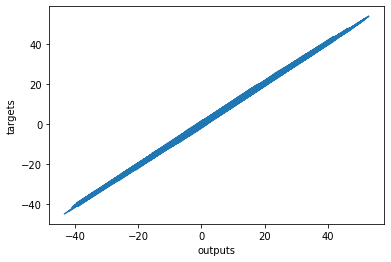

In [5]:
# The model is optimized, so the outputs are calculated based on the last form of the model

# We have to np.squeeze the arrays in order to fit them to what the plot function expects.
# Doesn't change anything as we cut dimensions of size 1 - just a technicality.
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()

# Voila - what you see should be exactly the same as in the previous notebook!
# You probably don't see the point of TensorFlow now - it took us the same number of lines of code
# to achieve this simple result. However, once we go deeper  TensorFlow will save us hundreds of lines of code.